# Sea Surface Temperature: Exploratory Analysis

In [55]:
%matplotlib inline
import numpy as np
import pandas as pd
import seaborn as sns
import xarray as xr
from matplotlib import pyplot as plt
from netCDF4 import Dataset

import cartopy
import cartopy.crs as ccrs

ABS_ZERO = -273.15

In [56]:
monthly_avg_ssts = xr.open_dataset('../SST_data/Historical/sst.mon.mean.nc', engine='netcdf4')
monthly_avg_ssts

<xarray.Dataset>
Dimensions:  (time: 499, lat: 720, lon: 1440)
Coordinates:
  * time     (time) datetime64[ns] 1981-09-01 1981-10-01 ... 2023-03-01
  * lat      (lat) float32 -89.88 -89.62 -89.38 -89.12 ... 89.38 89.62 89.88
  * lon      (lon) float32 0.125 0.375 0.625 0.875 ... 359.1 359.4 359.6 359.9
Data variables:
    sst      (time, lat, lon) float32 ...
Attributes:
    Conventions:    CF-1.5
    title:          NOAA/NCEI 1/4 Degree Daily Optimum Interpolation Sea Surf...
    institution:    NOAA/National Centers for Environmental Information
    source:         NOAA/NCEI https://www.ncei.noaa.gov/data/sea-surface-temp...
    References:     https://www.psl.noaa.gov/data/gridded/data.noaa.oisst.v2....
    dataset_title:  NOAA Daily Optimum Interpolation Sea Surface Temperature
    version:        Version 2.1
    comment:        Reynolds, et al.(2007) Daily High-Resolution-Blended Anal...

### Monthly tropical mean

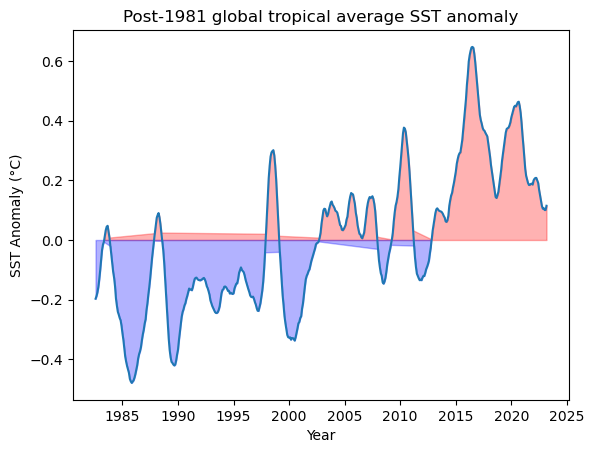

In [57]:
tropical_mean = monthly_avg_ssts['sst'].sel(lat=slice(-20,20)).mean(dim=['lat', 'lon'])
historical_tropical_mean = tropical_mean.mean(dim='time').values
rolling_tropical_mean = tropical_mean.rolling(time=12).mean().dropna(dim='time')
historical_tropical_mean_anomaly = rolling_tropical_mean - historical_tropical_mean
tropical_anomaly_df = historical_tropical_mean_anomaly.to_dataframe().reset_index()

def plot_anomaly(df, x_name, y_name, title, x_label, y_label):
    ax = sns.lineplot(data = df,y=y_name, x=x_name)
    line_obj = ax.lines[0]
    x1 = line_obj.get_xydata()[:,0]
    y1 = line_obj.get_xydata()[:,1]

    x1_pos = x1[y1 > 0]
    y1_pos = y1[y1 > 0]

    x1_neg = x1[y1 < 0]
    y1_neg = y1[y1 < 0]

    ax.fill_between(x1_pos,y1_pos, color="red", alpha=0.3)
    ax.fill_between(x1_neg,y1_neg, color="blue", alpha=0.3)
    ax.set_xlabel(x_label)
    ax.set_ylabel(y_label)
    ax.set_title(title)
    plt.show()
    fig = ax.get_figure()
    fig.savefig('tropical_sst_anomaly')

plot_anomaly(
    tropical_anomaly_df, 
    y_name='sst', 
    x_name='time', 
    title='Post-1981 global tropical average SST anomaly', 
    x_label='Year', 
    y_label='SST Anomaly (°C)')

In [58]:
monthly_avg_ssts

<xarray.Dataset>
Dimensions:  (time: 499, lat: 720, lon: 1440)
Coordinates:
  * time     (time) datetime64[ns] 1981-09-01 1981-10-01 ... 2023-03-01
  * lat      (lat) float32 -89.88 -89.62 -89.38 -89.12 ... 89.38 89.62 89.88
  * lon      (lon) float32 0.125 0.375 0.625 0.875 ... 359.1 359.4 359.6 359.9
Data variables:
    sst      (time, lat, lon) float32 ...
Attributes:
    Conventions:    CF-1.5
    title:          NOAA/NCEI 1/4 Degree Daily Optimum Interpolation Sea Surf...
    institution:    NOAA/National Centers for Environmental Information
    source:         NOAA/NCEI https://www.ncei.noaa.gov/data/sea-surface-temp...
    References:     https://www.psl.noaa.gov/data/gridded/data.noaa.oisst.v2....
    dataset_title:  NOAA Daily Optimum Interpolation Sea Surface Temperature
    version:        Version 2.1
    comment:        Reynolds, et al.(2007) Daily High-Resolution-Blended Anal...

In [59]:

# IMPORT OUR MONTHLY MEAN SST DATA


MIN_LAT = -30
MAX_LAT = 30

MIN_LONG = 30
MAX_LONG = 300

NUM_DATAPOINTS_IN_YEAR = 12
monthly_avg_ssts = monthly_avg_ssts.sel(lon = slice(MIN_LONG, MAX_LONG), lat=slice(MIN_LAT, MAX_LAT))
# monthly_avg_ssts





### Where has warming been the worst?

In [60]:

# TODO: EXAMINE THE NAN's that appear here

with_deltas = monthly_avg_ssts.assign(delta = monthly_avg_ssts['sst'] - monthly_avg_ssts['sst'].mean('time'))
with_deltas


<xarray.Dataset>
Dimensions:  (time: 499, lat: 240, lon: 1080)
Coordinates:
  * time     (time) datetime64[ns] 1981-09-01 1981-10-01 ... 2023-03-01
  * lat      (lat) float32 -29.88 -29.62 -29.38 -29.12 ... 29.38 29.62 29.88
  * lon      (lon) float32 30.12 30.38 30.62 30.88 ... 299.1 299.4 299.6 299.9
Data variables:
    sst      (time, lat, lon) float32 nan nan nan nan ... 20.7 20.73 20.81 20.94
    delta    (time, lat, lon) float32 nan nan nan nan ... -3.461 -3.377 -3.243
Attributes:
    Conventions:    CF-1.5
    title:          NOAA/NCEI 1/4 Degree Daily Optimum Interpolation Sea Surf...
    institution:    NOAA/National Centers for Environmental Information
    source:         NOAA/NCEI https://www.ncei.noaa.gov/data/sea-surface-temp...
    References:     https://www.psl.noaa.gov/data/gridded/data.noaa.oisst.v2....
    dataset_title:  NOAA Daily Optimum Interpolation Sea Surface Temperature
    version:        Version 2.1
    comment:        Reynolds, et al.(2007) Daily High-Resolution-Blended Anal...

In [61]:
recent_deltas = with_deltas.sel(time= with_deltas.time.dt.year >= 2012)
recent_delta_mean = recent_deltas['delta'].mean('time')
recent_delta_mean

<xarray.DataArray 'delta' (lat: 240, lon: 1080)>
array([[       nan,        nan,        nan, ...,        nan,        nan,
               nan],
       [       nan,        nan,        nan, ...,        nan,        nan,
               nan],
       [       nan,        nan,        nan, ...,        nan,        nan,
               nan],
       ...,
       [       nan,        nan,        nan, ..., 0.5100796 , 0.5056041 ,
        0.50632656],
       [       nan,        nan,        nan, ..., 0.5253843 , 0.51504666,
        0.5105601 ],
       [       nan,        nan,        nan, ..., 0.54540765, 0.5309363 ,
        0.52059174]], dtype=float32)
Coordinates:
  * lat      (lat) float32 -29.88 -29.62 -29.38 -29.12 ... 29.38 29.62 29.88
  * lon      (lon) float32 30.12 30.38 30.62 30.88 ... 299.1 299.4 299.6 299.9

### Heatmap of change in Indian Ocean sea surface temperatures

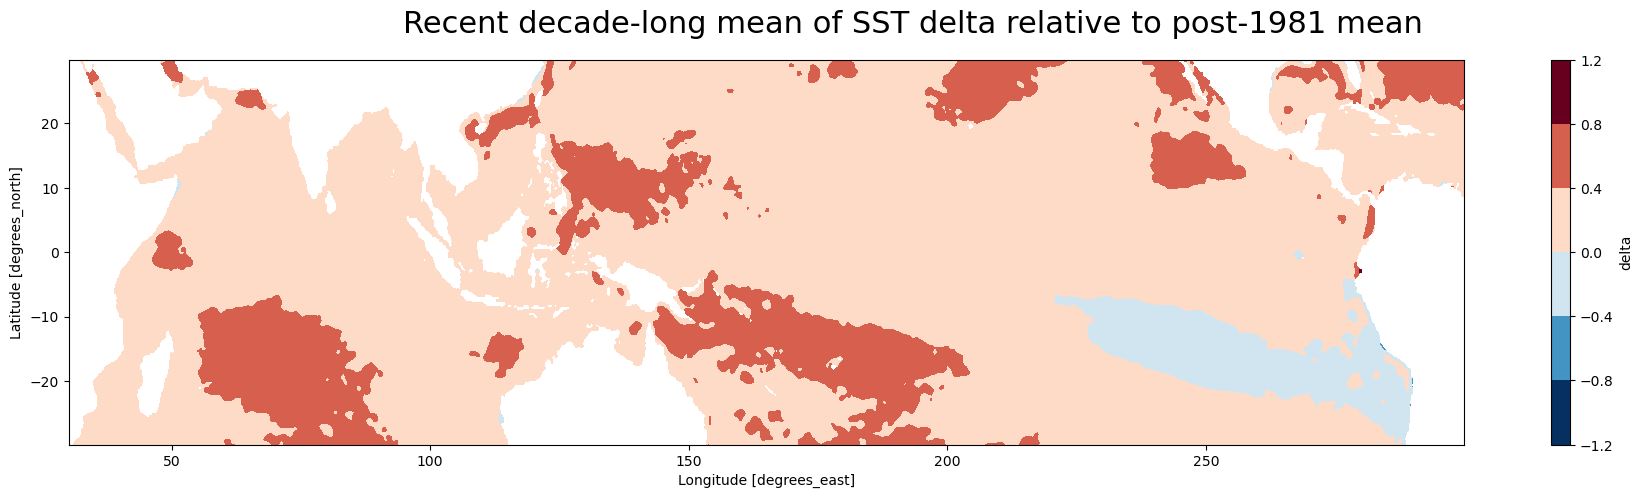

In [62]:
FIG_HEIGHT = 5
ASPECT_RATIO =(MAX_LONG - MIN_LONG)/(MAX_LAT-MIN_LAT)

fig = plt.figure(figsize=(ASPECT_RATIO*FIG_HEIGHT, FIG_HEIGHT))
recent_delta_mean.plot.contourf()
fig.suptitle("Recent decade-long mean of SST delta relative to post-1981 mean", fontsize= 22)
fig.savefig('./media/sst_decade.png')

In [63]:
import matplotlib.animation as animation
from IPython.display import HTML

# take rolling mean
with_deltas = with_deltas.assign(rolling_delta=lambda x: x.delta.rolling(time=NUM_DATAPOINTS_IN_YEAR).mean().dropna('time', how='all'))
RUN_ANIMATION = False

if RUN_ANIMATION:
    # TODO: change this to just take the DataArray and rerun
    fig, axes = plt.subplots(figsize=((max_long - min_long)/(max_lat-min_lat)*height, height))
    def animate(time):
        with_deltas.isel(time=time).rolling_delta.plot.contourf( ax=axes, add_colorbar= False)

    ani = animation.FuncAnimation(fig, animate, frames= range(0, len(with_deltas['time']), 2))


    mld = with_deltas.isel(time=0).rolling_delta.plot.contourf(ax=axes, add_colorbar= False)
    cbar= fig.colorbar(mld)
    cbar.set_label('SST Delta (degrees Kelvin)')
    fig.suptitle("SST Delta relative to post-1981 mean", fontsize= 22)

    ani.save('./media/sst_animation.gif', writer='imagemagick', fps = 14) #Save animation as gif-file

### How has this warming been affecting cyclone formation?

In [64]:
tropical_delta = recent_delta_mean.sel(lat=slice(-30, 5))
# NOTE that we are seeing warming basically everywhere in the tropics
# seems a bit positively skewed??
q75 = tropical_delta.quantile(q=[.75])
tropical_delta.quantile(q=[.1,.25,.5,.75,.9]) 

<xarray.DataArray 'delta' (quantile: 5)>
array([0.01594991, 0.13250787, 0.28224628, 0.3675261 , 0.42549761])
Coordinates:
  * quantile  (quantile) float64 0.1 0.25 0.5 0.75 0.9

In [65]:
warmest_locs = tropical_delta.where(tropical_delta > q75)
warmest_locs

<xarray.DataArray 'delta' (lat: 140, lon: 1080, quantile: 1)>
array([[[nan],
        [nan],
        [nan],
        ...,
        [nan],
        [nan],
        [nan]],

       [[nan],
        [nan],
        [nan],
        ...,
        [nan],
        [nan],
        [nan]],

       [[nan],
        [nan],
        [nan],
        ...,
...
        ...,
        [nan],
        [nan],
        [nan]],

       [[nan],
        [nan],
        [nan],
        ...,
        [nan],
        [nan],
        [nan]],

       [[nan],
        [nan],
        [nan],
        ...,
        [nan],
        [nan],
        [nan]]], dtype=float32)
Coordinates:
  * lat       (lat) float32 -29.88 -29.62 -29.38 -29.12 ... 4.375 4.625 4.875
  * lon       (lon) float32 30.12 30.38 30.62 30.88 ... 299.1 299.4 299.6 299.9
  * quantile  (quantile) float64 0.75

In [66]:
# find cyclones occurring in these locations
##TODO: file organisation
from utils.cyclone_utils import get_category, lat_long_string_to_float, time_to_season, get_cyclone_data
from datetime import datetime

one_per_id = get_cyclone_data(basin = None, min_cat = 1, one_per_id=True)
# cyclones_df['longitude'] = cyclones_df.loc[:,'Lon'].apply(lat_long_string_to_float)
# cyclones_df['longitude'] = cyclones_df.loc[:, 'longitude'].apply(lambda x: x if x > 0 else 360 + x)
# cyclones_df['latitude'] = cyclones_df.loc[:, 'Lat'].apply(lat_long_string_to_float)
# cyclones_df['peak_wind'] = cyclones_df.groupby('id')['Speed(knots)'].transform('max')
# cyclones_df['category'] = cyclones_df['peak_wind'].apply(get_category)
# cyclones_df.loc[:,'season'] = cyclones_df.loc[:, 'Time'].apply(lambda x: time_to_season((datetime.strptime(x, '%Y-%m-%d %X'))))
one_per_id.loc[:,'season_num'] = one_per_id.loc[:, 'season'].apply(lambda x: int(x.split('-')[0]))
# relevant_df = cyclones_df.loc[:,["id", "Time", "season_num", "latitude", "longitude", "Speed(knots)", "category"]]
# one_per_id = relevant_df.drop_duplicates(subset='id')
one_per_id


,id,Time,latitude,longitude,basin,Speed(knots),category,peak_wind,season,season_num
0,1,1981-07-25 12:00:00,-11.8,86.7,SI,20,1,30,1981-1982,1981
13,2,1981-10-21 06:00:00,-8.0,84.6,SI,40,2,85,1981-1982,1981
38,3,1981-11-03 18:00:00,-8.6,92.9,SI,55,2,80,1981-1982,1981
71,4,1981-12-05 00:00:00,-11.9,125.0,SI,45,1,45,1981-1982,1981
74,5,1981-12-29 00:00:00,-9.5,78.8,SI,20,1,45,1981-1982,1981
...,...,...,...,...,...,...,...,...,...,...
30412,998,2019-04-03 06:00:00,-8.2,132.3,SP,20,1,60,2018-2019,2018
30455,999,2019-04-21 18:00:00,-4.0,79.3,SI,20,3,90,2018-2019,2018
30456,1000,2019-04-21 18:00:00,-9.7,52.7,SI,20,4,125,2018-2019,2018
30512,1001,2019-05-06 12:00:00,-5.6,129.9,SI,20,1,55,2018-2019,2018


In [67]:
def is_warmed(lat, lon):
    return not np.isnan(warmest_locs.sel(lat=lat, lon=lon, method='nearest').item())

# GET INTENSE CYCLONES THAT FORMED NEAR OUR TOP 25% WARMED LOCATIONS
one_per_id['is_warmed'] = one_per_id.apply(lambda row: is_warmed(row['latitude'], row['longitude']),axis=1)
warmed_cyclones = one_per_id.loc[(one_per_id.loc[:, 'is_warmed'] == True)]
warmed_cyclones

,id,Time,latitude,longitude,basin,Speed(knots),category,peak_wind,season,season_num,is_warmed
74,5,1981-12-29 00:00:00,-9.5,78.8,SI,20,1,45,1981-1982,1981,True
139,8,1982-01-13 06:00:00,-13.0,114.1,SI,30,1,50,1981-1982,1981,True
239,12,1982-01-25 18:00:00,-18.0,154.1,SP,25,1,65,1981-1982,1981,True
240,13,1982-01-25 18:00:00,-16.9,173.2,SP,25,2,70,1981-1982,1981,True
273,14,1982-01-30 00:00:00,-15.0,65.2,SI,20,1,45,1981-1982,1981,True
...,...,...,...,...,...,...,...,...,...,...,...
30141,992,2019-03-01 06:00:00,-9.9,76.5,SI,20,3,115,2018-2019,2018,True
30234,995,2019-03-14 18:00:00,-8.1,151.0,SP,25,3,110,2018-2019,2018,True
30270,996,2019-03-18 06:00:00,-13.4,123.3,SI,20,4,130,2018-2019,2018,True
30312,997,2019-03-21 18:00:00,-14.1,62.0,SI,25,3,120,2018-2019,2018,True


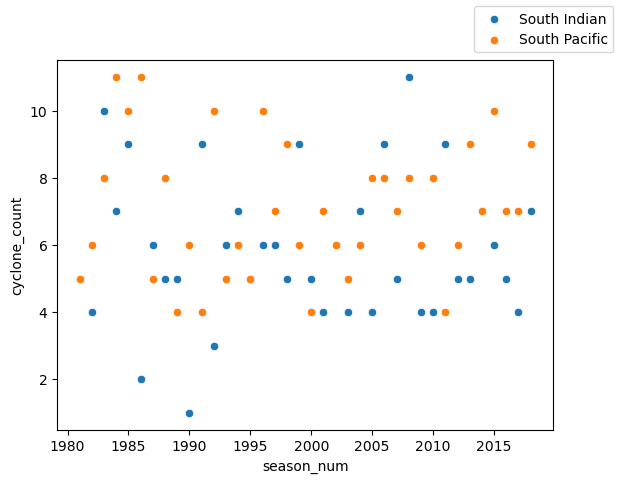

In [68]:
# TODO: split these between South Indian and South Pacific??
fig = plt.figure()
si_cyclone_counts_df = warmed_cyclones.loc[warmed_cyclones.loc[:, 'basin'] == 'SI'].groupby('season_num').size().to_frame('cyclone_count').reset_index()
sp_cyclone_counts_df = warmed_cyclones.loc[warmed_cyclones.loc[:, 'basin'] == 'SP'].groupby('season_num').size().to_frame('cyclone_count').reset_index()
sns.scatterplot(data=si_cyclone_counts_df, x='season_num', y='cyclone_count')
sns.scatterplot(data=sp_cyclone_counts_df, x='season_num', y='cyclone_count')
fig.legend(['South Indian', 'South Pacific'])
plt.show()


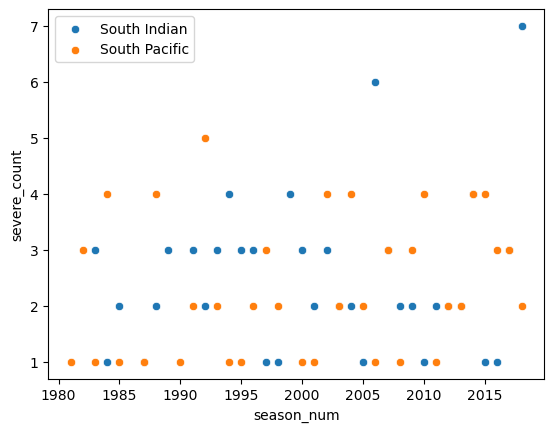

In [69]:
# bit of noise in the cat 1s and 2s so we'll filter them out
si_warmed_severe = warmed_cyclones.loc[(warmed_cyclones.loc[:, 'basin'] == 'SI') & (warmed_cyclones.loc[:, 'category'] >= 3)].groupby('season_num').size().to_frame('severe_count').reset_index()
sp_warmed_severe = warmed_cyclones.loc[(warmed_cyclones.loc[:, 'basin'] == 'SP') & (warmed_cyclones.loc[:, 'category'] >= 3)].groupby('season_num').size().to_frame('severe_count').reset_index()
fig = plt.figure()
sns.scatterplot(data=si_warmed_severe, x='season_num', y='severe_count')
sns.scatterplot( data=sp_warmed_severe, x='season_num', y='severe_count')
plt.legend(['South Indian', 'South Pacific'])
plt.show()

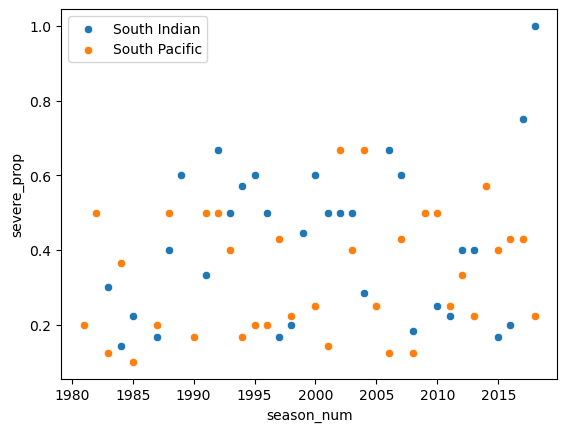

In [70]:
si_merged = si_cyclone_counts_df.merge(si_warmed_severe)
sp_merged = sp_cyclone_counts_df.merge(sp_warmed_severe)
si_merged['severe_prop'] = si_merged.loc[:,:].apply(lambda row: row['severe_count']/row['cyclone_count'], axis=1)
sp_merged['severe_prop'] = sp_merged.loc[:,:].apply(lambda row: row['severe_count']/row['cyclone_count'], axis=1)
fig = plt.figure()
sns.scatterplot(data=si_merged, x='season_num', y='severe_prop')
sns.scatterplot( data=sp_merged, x='season_num', y='severe_prop')
plt.legend(['South Indian', 'South Pacific'])
plt.show()

In [71]:
# sns.scatterplot(x=si_merged['severe_prop'], y=sp_merged['severe_prop'])
np.cov(si_merged['severe_prop'], sp_merged['severe_prop'][1:])

array([[0.04185797, 0.0038498 ],
       [0.0038498 , 0.02676175]])

#### Where are these formation sites?

In [72]:
## only show origin sites for now
min_long = warmed_severe['longitude'].min()
min_lat = warmed_severe['latitude'].min()

max_long = warmed_severe['longitude'].max()
max_lat = warmed_severe['latitude'].max()
centre_long = (max_long-min_long)/2

print('latitude: ' + str(min_lat) + ' to ' + str(max_lat))
print('longitude: ' + str(min_long) + ' to ' + str(max_long))

NameError: name 'warmed_severe' is not defined

/Users/albertdemskoy/mambaforge/envs/climateProjectEnv/lib/python3.11/site-packages/shapely/constructive.py:181: RuntimeWarning: invalid value encountered in buffer
  return lib.buffer(
/Users/albertdemskoy/mambaforge/envs/climateProjectEnv/lib/python3.11/site-packages/shapely/constructive.py:181: RuntimeWarning: invalid value encountered in buffer
  return lib.buffer(


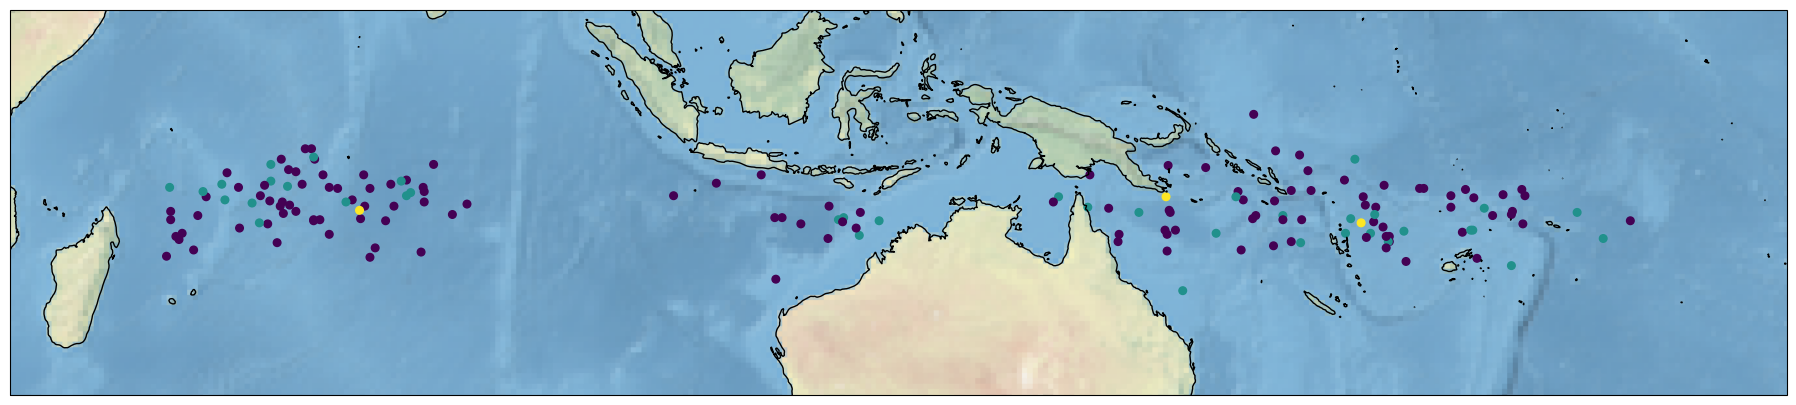

In [ ]:
height = 5
fig = plt.figure(figsize=((max_long - min_long)/(max_lat-min_lat)*height, height))
ax = plt.axes(projection=ccrs.PlateCarree(central_longitude= centre_long))
ax.set_extent([min_long - 15, max_long + 15 ,min_lat - 10,max_lat + 10], ccrs.PlateCarree())
ax.coastlines()
ax.stock_img()

plt.scatter(x=warmed_severe['longitude'], y=warmed_severe['latitude'], cmap='viridis',c=warmed_severe['category'], transform=ccrs.PlateCarree(), s=30)

plt.show()